# Usage

Import AISim plus numpy and matplotlib and print current version:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import aisim as ais
print(ais.__version__)

v0.4.0+5.g1100c4e.dirty


As an example, we simulate Rabi oscillations driven by stimulated Raman transitions in the presence of thermal motion.

First, we define a `AtomicEnsemble` object for atoms from a magneto-optical trap after sub-Doppler cooling:

In [2]:
# spherical atomic cloud with radius 3 mm
pos_params = {
     'mean_x': 0.0,
     'std_x' : 3.0e-3, 
     'mean_y': 0.0,
     'std_y' : 3.0e-3,
     'mean_z': 0.0,
     'std_z' : 3.0e-3
}

# cloud velocity spread in m/s at tempearture of 3 μK in x and y,
# and 150 nK in z (after a velocity selection process):
vel_params = {
     'mean_vx': 0.0,
     'std_vx' : ais.convert.vel_from_temp(3.0e-6), 
     'mean_vy': 0.0,
     'std_vy' : ais.convert.vel_from_temp(3.0e-6), 
     'mean_vz': 0.0,
     'std_vz' : ais.convert.vel_from_temp(150e-9)
}

# generate an AtomicEnsemble of 10000 atomsin the ground state
atoms = ais.create_random_ensemble_from_gaussian_distribution(
    pos_params,
    vel_params, int(1e4),
    state_vectors=[1, 0])

Only a fraction of these atoms will be detected after a time-of-flight of 800 ms. We model the detection region with radius of 5 mm:

In [3]:
det = ais.Detector(r_det=5e-3, t_det=800e-3)

We setup the two counter-propagating Raman laser beams with a wavelength of 780 nm, 30 mm beam diameter and a Rabi frequency of 15 kHz as  `IntensityProfile` and `WaveVectors` objects:

In [4]:
intensity_profile = ais.IntensityProfile(
    r_beam=15e-3,
    center_rabi_freq=2*np.pi*15e3)

wave_vectors = ais.Wavevectors( k1=2*np.pi/780e-9, k2=-2*np.pi/780e-9)

We select the atoms that are eventually detected, let those freely propagate for 100 ms before we start the Rabi oscillations up to 200 μs:

In [5]:
atoms = det.detected_atoms(atoms)
atoms = ais.prop.free_evolution(atoms, dt=100e-3)

state_occupation = []
taus = np.arange(200)*1e-6
for tau in taus:
    prop_atoms = ais.prop.transition(atoms, intensity_profile, tau, wave_vectors=wave_vectors)
    mean_occupation = np.mean(prop_atoms.state_occupation(state=1))
    state_occupation.append(mean_occupation)

Finally, we plot the results:

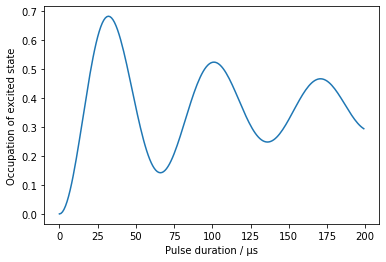

In [6]:
fig, ax = plt.subplots()
ax.plot(1e6*taus, state_occupation)
ax.set_xlabel('Pulse duration / μs')
ax.set_ylabel('Occupation of excited state');

We visualize the spread of the atomic ensemble and its convolution with the detector.

In [8]:
fig.savefig('rabi-oscillations.png')